本プログラムはDAI(@never_be_a_pm) さんの以下サイトのプログラムをベースに作成したものとなります。
公開にあたっては、DAIさんの許可を得ております。本プログラムの二次使用に関してはDAIさんに確認下さい（私への確認は不要です）

https://review-of-my-life.blogspot.jp/2017/10/python-web-scraping-data-collection-analysis.html

Python及び使用しているライブラリのバージョンの確認

In [1]:
import platform
print("python " + platform.python_version())
import pkg_resources
pkglist = ['selenium', 'pandas', 'numpy', 'matplotlib']
for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

python 3.6.1
selenium 3.8.0
pandas 0.20.1
numpy 1.14.0
matplotlib 2.0.2


必要ライブラリのインポート

In [2]:
from selenium import webdriver  
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

ベースになるcsvファイル作成

In [3]:
%%bash
echo "title,date,bookmarks" > trend.csv

スクレイピングのメインスクリプト

In [83]:
# Access to page
browser = webdriver.PhantomJS()  # DO NOT FORGET to set path
url = "http://b.hatena.ne.jp/search/text?q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&users=1"
browser.get(url)
df = pd.read_csv('trend.csv', index_col=0)

page = 1 #This number shows the number of current page later

while True: #continue until getting the last page
    print(len(browser.find_elements_by_css_selector(".centerarticle-pager-next")))
    if len(browser.find_elements_by_css_selector(".centerarticle-pager-next")) > 0:
        print("######################page: {} ########################".format(page))
        print("Starting to get posts...")
        #get all posts in a page
        posts = browser.find_elements_by_css_selector(".centerarticle-entry")
        for post in posts:
            title = post.find_element_by_css_selector("h3").text
            date = post.find_element_by_css_selector(".entry-contents-date").text
            bookmarks = post.find_element_by_css_selector(".centerarticle-users").text
            se = pd.Series([title, date, bookmarks],['title','date','bookmarks'])
            print(title + " " + date + " bookmarks=" + bookmarks)
            df = df.append(se, ignore_index=True)

        #after getting all posts in a page, click pager next and then get next all posts again

        btn = browser.find_element_by_css_selector(".centerarticle-pager-next")
        btn = btn.find_element_by_css_selector("a.js-keyboard-openable").get_attribute("href")

        print("next url:{}".format(btn))
        browser.get(btn)
        page+=1
        browser.implicitly_wait(10)
        print("Moving to next page......")
        time.sleep(10)
    else: #if no pager exist, stop.
        print("no pager exist anymore")
        break
df.to_csv("trend1.csv")
print("DONE")

1
######################page: 1 ########################
Starting to get posts...
ディープラーニングで動画に自動でモザイクをかける「ディープモザイク」作ってみました - karaage. [からあげ] 2018/06/04 bookmarks=15 users
バルミューダのDCモーター高級扇風機「GreenFan Japan」の風が静かで心地よい - karaage. [からあげ] 2018/06/01 bookmarks=2 users
有松の古い町並みでお散歩写真 - karaage. [からあげ] 2018/05/30 bookmarks=5 users
VRゴーグル「Oculus Go」購入・セットアップからおすすめコンテンツ・便利に使うTIPS情報まとめ - karaage. [からあげ] 2018/05/28 bookmarks=124 users
トルコと日本の友好の話「エルトゥールル号のことを忘れない」 - karaage. [からあげ] 2018/05/25 bookmarks=3 users
Intel Movidius + TensorFlowでRaspberry Piでもサクサク画像認識 - karaage. [からあげ] 2018/05/23 bookmarks=11 users
「karaage.」がまだ「KARAAGE」だったころの黒歴史を大公開 - karaage. [からあげ] 2018/05/21 bookmarks=19 users
妻の家庭に伝わる貝（あさり）の裏を箸でコチョコチョすると貝柱がめっちゃ綺麗にとれる秘技 - karaage. [からあげ] 2018/05/18 bookmarks=25 users
中判フィルムカメラをRaspberry Piを使ってデジタルカメラ化する「ZANGI BRONICA（ザンギブロニカ）」を開発中です - karaage. [からあげ] 2018/05/16 bookmarks=10 users
出版業界のソフトウェア化と出版社の未来 - karaage. [からあげ] 2018/05/14 bookmarks=28 users
SeleniumからStableになったHeadless Chrome/F

本当は恐ろしい！魑魅魍魎渦巻く株式投資の世界を描いた漫画 - karaage. [からあげ] 2017/11/24 bookmarks=82 users
iPhone Xの「Face ID」を紙切れ1枚で突破しようとしたら盛大に失敗しました - karaage. [からあげ] 2017/11/22 bookmarks=16 users
ハワイの朝の光 - karaage. [からあげ] 2017/11/17 bookmarks=6 users
IchigoJam（with Raspberry Pi)とPCでプログラムのソースコードをやりとりする方法（シリアル通信/ファイル変換） - karaage. [からあげ] 2017/11/15 bookmarks=17 users
新しい地図の「72時間ホンネテレビ」を見てAbemaTVがネット放送の覇権をとるんじゃないかと思った話 - karaage. [からあげ] 2017/11/13 bookmarks=6 users
ハワイのカカアコ地区で魚眼レンズで大迫力のストリートアート（ウォールアート）を撮影してきた - karaage. [からあげ] 2017/11/10 bookmarks=12 users
デジタル一眼レフ始めました - karaage. [からあげ] 2017/11/10 bookmarks=1 users
セットアップ30秒！起動3秒！！BASICで動くプログラミング教育ツール「IchigoJam」がRaspberry Pi上で動く「IchigoJam BASIC RPi」を試してみた - karaage. [からあげ] 2017/11/08 bookmarks=15 users
お前は今までにGet Wildした数を覚えているか？ 〜Get Wild and Analysis 2〜 - karaage. [からあげ] 2017/11/06 bookmarks=26 users
子どもがいる家庭で使うRaspberryPi＆Slack（技術編） | もやし工房 2017/11/04 bookmarks=2 users
京都ラーメン激戦区一番寺ラーメン通りの「中華そば 高安」さんでラーメンとからあげを同時に食して昇天 - karaage. [からあげ] 2017/11/01 bookmarks=9 us

Raspberry Piで温度・湿度・気圧を定期的にツイートするbotを作った - karaage. [からあげ] 2017/05/12 bookmarks=7 users
ルンバをRaspberry Piを使ってROSでコントロールできるように改造してみた（半田付け無しでOK） - karaage. [からあげ] 2017/05/12 bookmarks=427 users
無印良品の「ダメになるソファ」こと「体にフィットするソファ」を買い増ししたので新品と10年使い古した旧品を比較 - karaage. [からあげ] 2017/05/10 bookmarks=9 users
【2017年度版】MacとProcessingとKinect v1をセットアップして遊ぶ方法 - karaage. [からあげ] 2017/05/08 bookmarks=8 users
ロシアンたこ焼きでからあげ大パニック！たこ焼きパーティー（通称たこパ）したよ！ポロリもあるかも！ - karaage. [からあげ] 2017/05/06 bookmarks=13 users
iPhone7のApple Payで使ってない「Suica」取り込んで「モバイルSuica」登録するとかなりお得で便利 - karaage. [からあげ] 2017/05/04 bookmarks=28 users
iPhone7Plus＋スマホレンズセット「PL-A4」とミラーレスカメラで散りかけの桜を撮って比べてみた - karaage. [からあげ] 2017/04/27 bookmarks=4 users
はてなブログのフォトコンで人工知能を使ってはてなTシャツをゲットするためGUIのディープラーニングツール「CSLAIER」を使ってみた - karaage. [からあげ] 2017/04/24 bookmarks=19 users
仕事用カバンに大きめのザックを使いたかったのでマムートのザック「Seon Courier 30L」を買ったら大満足 - karaage. [からあげ] 2017/04/20 bookmarks=26 users
1週間で夫婦でキャリアのiPhoneをSIMフリーのiPhoneに買い換えて格安SIMに乗り換えチャレンジ - karaage. [からあげ] 2017/04/17 bo

Raspberry Pi Zero用の小型電源とUSB WiFiモジュール用USBコネクタを自作する - karaage. [からあげ] 2016/09/19 bookmarks=18 users
明治村で写真を撮る人を撮ってきました 〜SH WALK VOL.1〜 - karaage. [からあげ] 2016/09/14 bookmarks=13 users
【悲報】妻がマイクロバブル水に手を出していました - karaage. [からあげ] 2016/09/12 bookmarks=45 users
工場夜景用のLightroom プリセットを作ってみた - karaage. [からあげ] 2016/09/09 bookmarks=19 users
懐かし漫画を名シーンで振り返る「利いたふうな口をきくな〜〜〜〜！！」「だが、それがいい」＠花の慶次 〜雲の彼方に〜 - karaage. [からあげ] 2016/09/07 bookmarks=9 users
Git/GitHubで困った時の解決方法・TIPS - karaage. [からあげ] 2016/09/05 bookmarks=2 users
HOBBY STATION 2016/09/04 bookmarks=1 users
NATURA CLASSICA + AGFA VISTA PLUS 200 フィルム写真 - karaage. [からあげ] 2016/09/03 bookmarks=1 users
next url:http://b.hatena.ne.jp/search/text?page=8&q=http%3A%2F%2Fkaraage.hatenadiary.jp%2F&safe=on&sort=recent&users=1
Moving to next page......
1
######################page: 8 ########################
Starting to get posts...
Raspberry Pi Zeroの購入からRaspbian Jessie LITEをセットアップするまでの方法 - karaage. [からあげ] 2016/08/31 bookmarks=12 users
1歳の娘の目線で切り取る夏の思い出 - kara

Macのターミナル(Terminal)とVimの配色（カラースキーム）をおしゃれなSolarizedに変更 - karaage. [からあげ] 2016/03/11 bookmarks=1 users
はてなブログの編集モードを10年以上使い続けたはてな記法からMarkdown記法に乗り換えました - karaage. [からあげ] 2016/03/10 bookmarks=26 users
HOLGAレンズ（マイクロフォーサーズ用）でモノクロ写真 - karaage. [からあげ] 2016/03/09 bookmarks=4 users
SHUTTER HOLICさんで「モンヂャックホリック」開催中 - karaage. [からあげ] 2016/03/07 bookmarks=6 users
煮干しが強烈！渋谷駅近く「すごい！煮干しラーメン凪」に行ってきたニボ - karaage. [からあげ] 2016/03/04 bookmarks=5 users
iOS版の爽快横シューティングゲーム「デススマイルズ」が2/29まで無料配信中 - karaage. [からあげ] 2016/03/03 bookmarks=7 users
電波な汚部屋を大公開して大後悔 - karaage. [からあげ] 2016/03/03 bookmarks=26 users
CP+2016で見つけた変なもの - karaage. [からあげ] 2016/03/02 bookmarks=17 users
CP+2016 欲しくなってしまったけど買えないカメラ - karaage. [からあげ] 2016/02/29 bookmarks=10 users
SHUTTER HOLICさんで夫婦お揃いでおしゃれカメラストラップを購入 - karaage. [からあげ] 2016/02/26 bookmarks=5 users
Raspberry Piで作ったロボットがネコ型ロボット「レモンちゃんbot」に大変身 - karaage. [からあげ] 2016/02/25 bookmarks=17 users
HOLGA DIGITALで赤外線写真撮影 - karaage. [からあげ] 2016/02/24 bookmarks=9 users
GitHub実践入門読んだ - karaage. [か

100均ショップ（セリア）で全部揃う自作ベビーサークル - karaage. [からあげ] 2015/10/01 bookmarks=7 users
「仕事・人生に疲れた」そんなあなたに贈る最高のプライムビデオのエンターテイメント - karaage. [からあげ] 2015/09/30 bookmarks=5 users
Raspberry PiでAmazonプライムビデオプレイヤ作ろうとしてダメだった件 - karaage. [からあげ] 2015/09/28 bookmarks=12 users
Raspberry Pi 2にROS(Robot Operating System)をインストールしてみる - karaage. [からあげ] 2015/09/25 bookmarks=14 users
プログラムするエディタにVimを使う - karaage. [からあげ] 2015/09/24 bookmarks=3 users
pythonで画像処理の環境設定@Mac & Raspberry Pi - karaage. [からあげ] 2015/09/23 bookmarks=37 users
Raspberry Piのミュージックサーバにビデオサーバ機能を追加する - karaage. [からあげ] 2015/09/22 bookmarks=1 users
Electroluxの掃除機はバッテリ交換に注意 - karaage. [からあげ] 2015/09/21 bookmarks=2 users
おひるねアート写真にチャレンジしてみた - karaage. [からあげ] 2015/09/20 bookmarks=8 users
味噌パウダーよ永遠に カレーmeets味噌パウダー - karaage. [からあげ] 2015/09/19 bookmarks=1 users
種無しで皮ごと食べられる高級ブドウ「ナガノパープル」を食す - karaage. [からあげ] 2015/09/19 bookmarks=12 users
Lightroomで1枚の写真からFakeHDRを作るプリセット - karaage. [からあげ] 2015/09/18 bookmarks=26 users
next url:http://b.hatena.ne.jp/search/t

リチウムイオン電池の特性からパソコン・デジカメのバッテリを長持ちさせる方法を考える - karaage. [からあげ] 2015/04/14 bookmarks=1 users
噂のごっさんのグリーンカレーが猛烈に食べたくなったので妻につくってもらいました - karaage. [からあげ] 2015/04/13 bookmarks=2 users
WEB漫画『ネコマン』 まとめ - karaage. [からあげ] 2015/04/13 bookmarks=1 users
OS X YosemiteにアップデートしたらAperture終了PhotosがダメダメなのでLightroomに移行決意しました - karaage. [からあげ] 2015/04/12 bookmarks=26 users
WEB漫画『ネコマン』 第34話「サイボーグネコマン」 - karaage. [からあげ] 2015/04/09 bookmarks=1 users
チップチューン＋トランス＋デスメタル＋エモ＝「Fear, and Loathing in Las Vegas」? - karaage. [からあげ] 2015/04/08 bookmarks=2 users
SHUTTER HOLICさん主催の桜撮影会「sakura and …」に参加しました - karaage. [からあげ] 2015/04/05 bookmarks=10 users
昔話に出てくるような旅館「潮生館」で志太温泉を堪能 - karaage. [からあげ] 2015/04/02 bookmarks=4 users
静岡旅行写真日記 〜アプト式鉄道で秘境駅奥大井湖上駅へ〜 - karaage. [からあげ] 2015/04/01 bookmarks=8 users
愛知県岡崎公園の夜桜写真 - karaage. [からあげ] 2015/03/31 bookmarks=8 users
静岡旅行写真日記 〜大井川鐵道SLで新金谷から千頭駅編〜 - karaage. [からあげ] 2015/03/30 bookmarks=3 users
静岡旅行しおり 〜SLから温泉そしてうなぎまで〜 - karaage. [からあげ] 2015/03/28 bookmarks=1 users
葉桜気味の河津桜を中望遠レンズで撮る 

自作デジカメ制作 【機能拡張編その1】メニューとエフェクトをつけてみよう - karaage. [からあげ] 2014/10/14 bookmarks=9 users
iPhone6Plusで撮ったタイムラプス＆スーパースローモーション動画 - karaage. [からあげ] 2014/10/13 bookmarks=11 users
「WALKtan@NAGOYA vol.3」に参加しました - karaage. [からあげ] 2014/10/13 bookmarks=3 users
フィルム写真で振り返る夏のおもひで - karaage. [からあげ] 2014/10/08 bookmarks=1 users
フィルム写真で切り取る日常 - karaage. [からあげ] 2014/10/06 bookmarks=4 users
SHUTTER HOLICさんでiPhone6Plus用の理想のハンギングケース購入しました - karaage. [からあげ] 2014/10/05 bookmarks=8 users
自作デジカメ制作 【ソフトウェア編その4】デジカメとりあえず完成 - karaage. [からあげ] 2014/10/03 bookmarks=14 users
iPhone6Plusでかくて使いにくい！すぐ曲がる！的な記事が読みたいんだろう！ - karaage. [からあげ] 2014/09/30 bookmarks=1 users
ろん誕のために妻がロンスタ・モンヂャック・みそメンクッキー作りました - karaage. [からあげ] 2014/09/29 bookmarks=1 users
瀬戸デジタルリサーチパークで「トイデジ☆パラダイス」現地観覧してきました - karaage. [からあげ] 2014/09/27 bookmarks=2 users
iPhone6Plusのバッテリ劣化を防止するため古いミニノートをタイマーコンセントにしてみました - karaage. [からあげ] 2014/09/27 bookmarks=2 users
自作デジカメ制作 【ソフトウェア編その2】 ディスプレイに絵・文字・写真を表示しよう - karaage. [からあげ] 2014/09/23 bookmarks=12 users
iPhone6か6P

Moving to next page......
1
######################page: 20 ########################
Starting to get posts...
Processingで人がぐにゃんぐにゃんになるスリットスキャン動画を作ってみました - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/06/23 bookmarks=5 users
Macのターミナルだけを使ってグリッチ画像アートを楽しむ方法 - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/06/21 bookmarks=16 users
オカザえもん撮影会@Shutter Holic主催 - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/06/19 bookmarks=2 users
雷雨の中サマーソニック2012大阪に行ってきました - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/05/22 bookmarks=1 users
新婚旅行（トルコ）写真 - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/05/12 bookmarks=1 users
三重のB級スポット ルーブル彫刻美術館に行ってきました - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/04/30 bookmarks=3 users
正月にみかん食べながら読むべき珠玉のWEB漫画 2013年版 - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/04/22 bookmarks=10 users
Macに初音ミクをインストール OS X Mountain Lion対応 - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2013/03/18 bookmarks=4 users
βエンドルフィンがドバドバでるドリンクでアヘ顔ダブルピース☆ - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2012/12/28 bookmarks=3 users
とびだせどうぶつの森のマイデザイン補助ツールをProcessingでつくる - KARAAGE[からあげに勝手にレモンをかける奴は死刑！] 2012/

気になれば以下を手動で編集
- 何故か1個目のデータだけ読み込めないので、手動で`trend1.csv`に書き込む  
- 他のサイトの記事を手動で削除

データを読み込んで整形する

In [108]:
df = pd.read_csv("trend1.csv")
data = df.drop("Unnamed: 0", axis = 1)
data = data.drop(0)
data.head()

,date,bookmarks,title
1,2018/06/01,2 users,バルミューダのDCモーター高級扇風機「GreenFan Japan」の風が静かで心地よい -...
2,2018/05/30,5 users,有松の古い町並みでお散歩写真 - karaage. [からあげ]
3,2018/05/28,124 users,VRゴーグル「Oculus Go」購入・セットアップからおすすめコンテンツ・便利に使うTIP...
4,2018/05/25,3 users,トルコと日本の友好の話「エルトゥールル号のことを忘れない」 - karaage. [からあげ]
5,2018/05/23,11 users,Intel Movidius + TensorFlowでRaspberry Piでもサクサク...


ブックマークを x users -> x に変換

In [109]:
data['bookmarks'] = data['bookmarks'].str.replace('users', '')
data['bookmarks'] = data['bookmarks'].astype('int')
data.head()

,date,bookmarks,title
1,2018/06/01,2,バルミューダのDCモーター高級扇風機「GreenFan Japan」の風が静かで心地よい -...
2,2018/05/30,5,有松の古い町並みでお散歩写真 - karaage. [からあげ]
3,2018/05/28,124,VRゴーグル「Oculus Go」購入・セットアップからおすすめコンテンツ・便利に使うTIP...
4,2018/05/25,3,トルコと日本の友好の話「エルトゥールル号のことを忘れない」 - karaage. [からあげ]
5,2018/05/23,11,Intel Movidius + TensorFlowでRaspberry Piでもサクサク...


ブックマークの多い順にソートする

In [110]:
sort_data = data.sort_values(by=["bookmarks"], ascending=False)
sort_data.head()

,date,bookmarks,title
15,2018/05/02,1361,私の会社の機械学習経験ゼロの「ディープラーニングおじさん」が会社のAI戦略を動かすまで - ...
58,2018/01/31,1229,松尾研究室が無料公開している「Deep Learning基礎講座演習コンテンツ」の自主学習方...
76,2017/12/27,844,Pythonで最初に知っておきたかったことのまとめ【初心者向け】 - karaage. [か...
154,2017/07/26,786,子育て世代に送る「デジタル写真管理システム」構築のススメ 簡単共有＆自動バックアップを可能に...
220,2017/01/25,779,収納下手を克服するため妻監修のもと無印良品中心に理想の収納システムを構築しました - kar...


ブックマークの年毎の比較

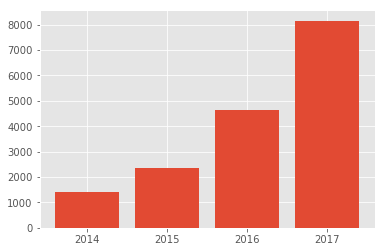

In [111]:
plt.style.use('ggplot')
year2017 = data[data["date"].str.contains("2017/", na=False)]
year2016 = data[data["date"].str.contains("2016/", na=False)]
year2015 = data[data["date"].str.contains("2015/", na=False)]
year2014 = data[data["date"].str.contains("2014/", na=False)]
bm_2017 = year2017["bookmarks"].sum()
bm_2016 = year2016["bookmarks"].sum()
bm_2015 = year2015["bookmarks"].sum()
bm_2014 = year2014["bookmarks"].sum()

left = np.array([1, 2, 3, 4])
label = ["2014", "2015", "2016", "2017"]
height = np.array([bm_2014, bm_2015, bm_2016, bm_2017])
plt.bar(left, height, tick_label=label, align="center")
plt.show()

ブックマークのヒストグラム

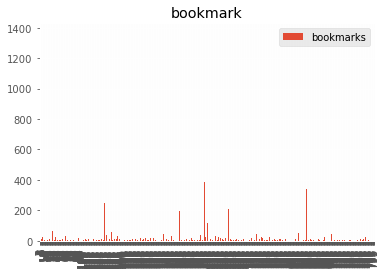

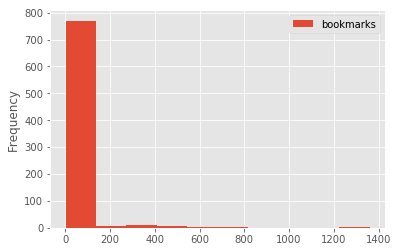

In [112]:
df_bm = data.iloc[:, [1]]
df_bm.plot.bar()
plt.title('bookmark')
df_bm.plot(kind='hist')
plt.show()